In [5]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import networkx as nx
import seaborn as sns

## Individual energetics scale up to community coexistence: Movement, metabolism and biodiversity dynamics in fragmented landscapes 

Leonna Szangolies, Cara Gallagher, Florian Jeltsch

In [4]:
colors=sns.color_palette("rocket",10)

#### Population and Community dynamics under fragmentation:

In [72]:
all2 = pd.read_csv("manuscript_fragmentation_community.csv")

In [59]:
all2_single = pd.read_csv("manuscript_fragmentation_single.csv")

In [39]:
indivs_more2=np.zeros((4,10,20,10950))
fmr_more2=np.zeros((4,10,20))
loco_more2=np.zeros((4,10,20))
repro_more2=np.zeros((4,10,20))
grow_more2=np.zeros((4,10,20))
basal_more2=np.zeros((4,10,20))
digest_more2=np.zeros((4,10,20))
intake_more2=np.zeros((4,10,20))
repsuchr_more2=np.zeros((4,10,20))

species_more2=np.zeros((4,20))
covia_more2=np.zeros((4,20))
indivs_covia_more2=np.zeros((4,20,10))
f=all2
ix=0
for i in [0.9999,0.999,0.99,0.9]:
                f1=f[f["clump"]==i]
                rx=0
                for r in np.unique(f1["[run number]"]):
                        f1_sub=f1[f1["[run number]"]==r]
                        for j in range(10):
                            current_array=str.split(list(f1_sub["number"+str(j)])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            indivs_more2[ix,j,rx,:len(desired_array)]=desired_array
                            
                            fmr_more2[ix,j,rx]=f1_sub["mean fmr"+str(j)]
                            loco_more2[ix,j,rx]=f1_sub["mean loco"+str(j)]
                            repro_more2[ix,j,rx]=f1_sub["mean repro"+str(j)]
                            grow_more2[ix,j,rx]=f1_sub["mean grow"+str(j)]
                            basal_more2[ix,j,rx]=f1_sub["mean basal"+str(j)]
                            digest_more2[ix,j,rx]=f1_sub["mean digest"+str(j)]
                            intake_more2[ix,j,rx]=f1_sub["mean in"+str(j)]
                            repsuchr_more2[ix,j,rx]=f1_sub["mean rep_success_hr_"+str(j)]
                           
                       
                        covia_more2[ix,rx]=np.where(np.sum(indivs_more2[ix,:,rx]>0,axis=0)<5)[0][0]
                        if covia_more2[ix,rx]<3648:
                            indivs_covia_more2[ix,rx]=indivs_more2[ix,:,rx,int(covia_more2[ix,rx])]
                        else:
                            indivs_covia_more2[ix,rx]=indivs_more2[ix,:,rx,3647]
                        rx=rx+1
                species_more2[ix]=f1["spec_num"] 
                ix=ix+1

In [60]:
indivs_single2=np.zeros((4,10,20,10950))
fmr_single2=np.zeros((4,10,20))
loco_single2=np.zeros((4,10,20))
repro_single2=np.zeros((4,10,20))
grow_single2=np.zeros((4,10,20))
basal_single2=np.zeros((4,10,20))
digest_single2=np.zeros((4,10,20))
intake_single2=np.zeros((4,10,20))
repsuchr_single2=np.zeros((4,10,20))

f=all2_single
ix=0
for i in [0.9999,0.999,0.99,0.9]:
            f1=f[f["clump"]==i]
            for j in range(10):
                f11=f1[f1["specs-included"]==j]
                rx=0
                for r in np.unique(f11["[run number]"]):
                            f1_sub=f11[f11["[run number]"]==r]
                            current_array=str.split(list(f1_sub["number"])[0])[1:-1]
                            desired_array=np.transpose([float(numeric_string) for numeric_string in current_array])
                            indivs_single2[ix,j,rx,:len(desired_array)]=desired_array
                            
                            fmr_single2[ix,j,rx]=f1_sub["mean (sentence fmr0 fmr1 fmr2 fmr3 fmr4 fmr5 fmr6 fmr7 fmr8 fmr9)"]
                            loco_single2[ix,j,rx]=f1_sub["mean (sentence loco0 loco1 loco2 loco3 loco4 loco5 loco6 loco7 loco8 loco9)"]
                            repro_single2[ix,j,rx]=f1_sub["mean (sentence repro0 repro1 repro2 repro3 repro4 repro5 repro6 repro7 repro8 repro9)"]
                            grow_single2[ix,j,rx]=f1_sub["mean (sentence grow0 grow1 grow2 grow3 grow4 grow5 grow6 grow7 grow8 grow9)"]
                            basal_single2[ix,j,rx]=f1_sub["mean (sentence basal0 basal1 basal2 basal3 basal4 basal5 basal6 basal7 basal8 basal9)"]
                            digest_single2[ix,j,rx]=f1_sub["mean (sentence digest0 digest1 digest2 digest3 digest4 digest5 digest6 digest7 digest8 digest9)"]
                            intake_single2[ix,j,rx]=f1_sub["mean (sentence in0 in1 in2 in3 in4 in5 in6 in7 in8 in9)"]
                            repsuchr_single2[ix,j,rx]=f1_sub["mean (sentence rep_success_hr_0 rep_success_hr_1 rep_success_hr_2 rep_success_hr_3 rep_success_hr_4 rep_success_hr_5 rep_success_hr_6 rep_success_hr_7 rep_success_hr_8 rep_success_hr_9)"]
                            
                            rx=rx+1
            ix=ix+1

Figure 3:

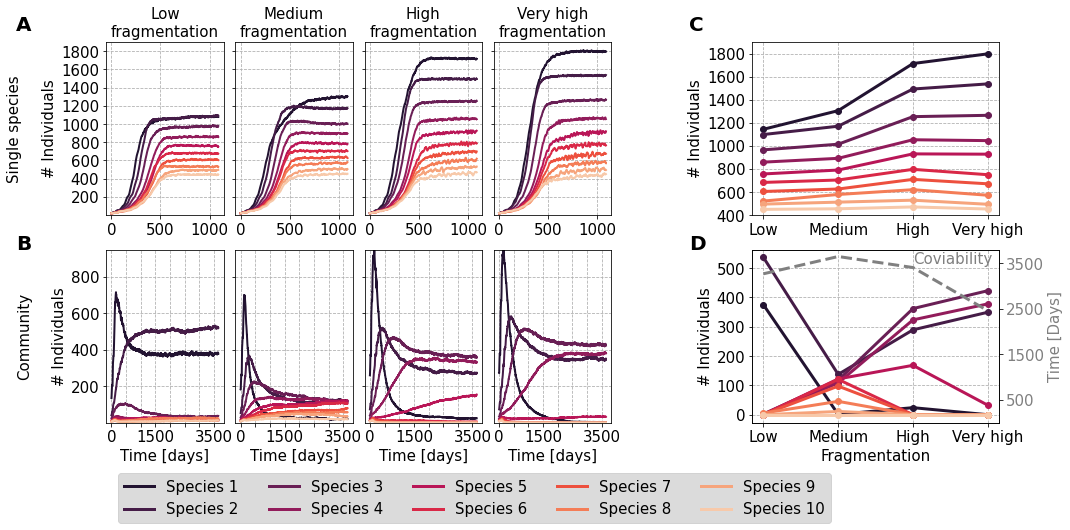

In [73]:
plt.figure(figsize=(16,7))

for j in range(4):
    plt.subplot2grid((2,7),(1,j))
    plt.subplots_adjust(wspace=0.1)
    for i in range(10):
        plt.plot(np.mean(indivs_more2[j,i,:,:3645],axis=0),linewidth=2,color=colors[i],label="Species "+str(i+1))
    plt.grid(b=True,linestyle="--")
    plt.ylim(0,950)
    plt.xticks([0,500,1000,1500,2000,2500,3000,3500],[0,"","",1500,"","","",3500],fontsize=15)
    plt.xlabel("Time [days]",fontsize=15)
    if j==0:
        plt.ylabel("Community\n\n# Individuals",fontsize=15)
        plt.yticks([200,400,600,800],[200,400,600,800],fontsize=15)
    else:
        plt.yticks([200,400,600,800],[])
    
    plt.subplot2grid((2,7),(0,j))
    plt.subplots_adjust(wspace=0.1)
    for i in range(10):
        plt.plot(np.mean(indivs_single2[j,i,:,:1090],axis=0),linewidth=2,color=colors[i],label="Species "+str(i+1))
    plt.grid(b=True,linestyle="--")
    plt.ylim(0,1900)
    plt.xticks([0,500,1000],[0,500,1000],fontsize=15)
    plt.title(["Low","Medium","High","Very high"][j]+"\nfragmentation",fontsize=15)
    if j==0:
        plt.ylabel("Single species\n\n# Individuals",fontsize=15)
        plt.yticks([200,400,600,800,1000,1200,1400,1600,1800],[200,400,600,800,1000,1200,1400,1600,1800],fontsize=15)
    else:
        plt.yticks([200,400,600,800,1000,1200,1400,1600,1800],[])

ax1=plt.subplot2grid((2,7),(1,5),colspan=2)
for i in range(10):
    c=colors[i]
    ax1.plot(np.nanmedian(indivs_more2[:,i,:,3647],axis=1),"-o",color=c,linewidth=3)
    ax1.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)
plt.xticks(range(4),["Low","Medium","High","Very high"],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("# Individuals",fontsize=15)
plt.xlabel("Fragmentation",fontsize=15)
plt.grid(b=True,linestyle="--")
ax2 = ax1.twinx()
ax2.plot(np.mean(covia_more2,axis=1),"--",color="grey",linewidth=3)
plt.ylim(0,3800)
plt.yticks([500,1500,2500,3500],[500,1500,2500,3500],fontsize=15,color="grey")
plt.ylabel("Time [Days]",fontsize=15,color="grey")
plt.text(2,3500,"Coviability",color="grey",fontsize=15)
ax1.legend(bbox_to_anchor=(0.35,-0.25),ncol=5,fontsize=15,facecolor="lightgrey");

plt.subplot2grid((2,7),(0,5),colspan=2)
for i in range(10):
    c=colors[i]
    plt.plot(np.nanmedian(indivs_single2[:,i,:,1090],axis=1),"-o",color=c,linewidth=3)
    plt.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)
plt.xticks(range(4),["Low","Medium","High","Very high"],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("# Individuals",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.ylim(400,1900)
plt.text(-10,2000,"A",size=20, weight='bold')
plt.text(-10,100,"B",size=20, weight='bold')
plt.text(-1,2000,"C",size=20, weight='bold')
plt.text(-1,100,"D",size=20, weight='bold');

#plt.savefig("Figure3.eps", dpi=600, format='eps', metadata=None,bbox_inches="tight",backend=None)

#### Individual energetics 

Field metabolic rate composition in community simulation (total colored area is 1):

Figure 4:

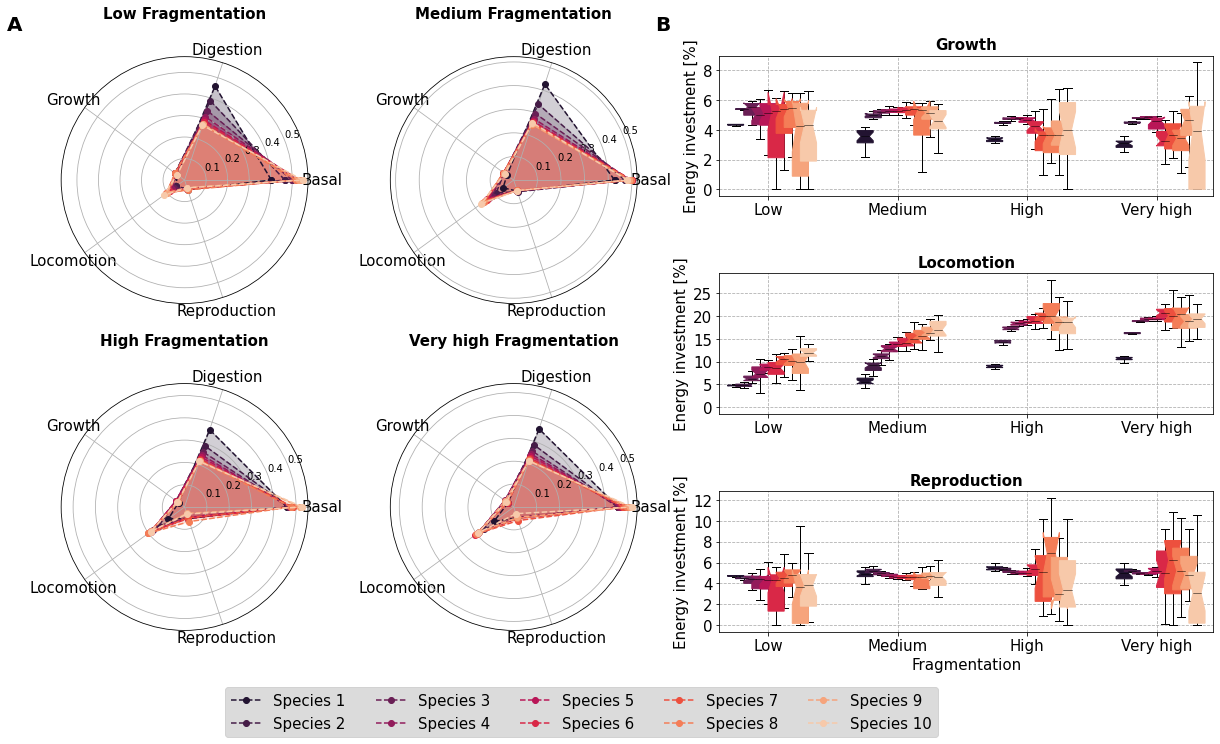

In [74]:
fig=plt.figure(figsize=(16,8))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=2.5)
ax=plt.subplot2grid((6,14),(0,0),polar=True,colspan=3,rowspan=3)#fig.add_subplot(polar=True)

for i in range(10):

    fmr_parts=np.array([np.nanmedian(basal_more2[:,i,:],axis=1),np.nanmedian(digest_more2[:,i,:],axis=1),np.nanmedian(grow_more2[:,i,:],axis=1),np.nanmedian(loco_more2[:,i,:],axis=1),np.nanmedian(repro_more2[:,i,:],axis=1),np.nanmedian(basal_more2[:,i,:],axis=1)])
    subjects=np.array(["Basal","Digestion","Growth","Locomotion","Reproduction","Basal"])
    angles=np.linspace(0,2*np.pi,5, endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    ax.plot(angles,fmr_parts[:,0], 'o--', color=colors[i], label='Low')
    ax.fill(angles, fmr_parts[:,0], alpha=0.25, color=colors[i])
    ax.set_thetagrids(angles[:-1] * 180/np.pi, subjects[:-1], fontsize=15)
    ax.set_title("Low Fragmentation\n", fontsize=15, weight='bold')
    
    
ax=plt.subplot2grid((6,14),(0,4),polar=True,colspan=3,rowspan=3)#fig.add_subplot(polar=True)

for i in range(10):

    fmr_parts=np.array([np.nanmedian(basal_more2[:,i,:],axis=1),np.nanmedian(digest_more2[:,i,:],axis=1),np.nanmedian(grow_more2[:,i,:],axis=1),np.nanmedian(loco_more2[:,i,:],axis=1),np.nanmedian(repro_more2[:,i,:],axis=1),np.nanmedian(basal_more2[:,i,:],axis=1)])
    subjects=np.array(["Basal","Digestion","Growth","Locomotion","Reproduction","Basal"])
    angles=np.linspace(0,2*np.pi,5, endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    ax.plot(angles,fmr_parts[:,1], 'o--', color=colors[i], label='Medium')
    ax.fill(angles, fmr_parts[:,1], alpha=0.2, color=colors[i])
    ax.set_thetagrids(angles[:-1] * 180/np.pi, subjects[:-1], fontsize=15)
    ax.set_title("Medium Fragmentation\n", fontsize=15, weight='bold')
    
    
ax=plt.subplot2grid((6,14),(3,0),polar=True,colspan=3,rowspan=3)#fig.add_subplot(polar=True)

for i in range(10):

    fmr_parts=np.array([np.nanmedian(basal_more2[:,i,:],axis=1),np.nanmedian(digest_more2[:,i,:],axis=1),np.nanmedian(grow_more2[:,i,:],axis=1),np.nanmedian(loco_more2[:,i,:],axis=1),np.nanmedian(repro_more2[:,i,:],axis=1),np.nanmedian(basal_more2[:,i,:],axis=1)])
    subjects=np.array(["Basal","Digestion","Growth","Locomotion","Reproduction","Basal"])
    angles=np.linspace(0,2*np.pi,5, endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    ax.plot(angles,fmr_parts[:,2], 'o--', color=colors[i], label='High')
    ax.fill(angles, fmr_parts[:,2], alpha=0.2, color=colors[i])
    ax.set_thetagrids(angles[:-1] * 180/np.pi, subjects[:-1], fontsize=15)
    ax.set_title("High Fragmentation\n", fontsize=15, weight='bold')
    
ax=plt.subplot2grid((6,14),(3,4),polar=True,colspan=3,rowspan=3)#fig.add_subplot(polar=True)

for i in range(10):

    fmr_parts=np.array([np.nanmedian(basal_more2[:,i,:],axis=1),np.nanmedian(digest_more2[:,i,:],axis=1),np.nanmedian(grow_more2[:,i,:],axis=1),np.nanmedian(loco_more2[:,i,:],axis=1),np.nanmedian(repro_more2[:,i,:],axis=1),np.nanmedian(basal_more2[:,i,:],axis=1)])
    subjects=np.array(["Basal","Digestion","Growth","Locomotion","Reproduction","Basal"])
    angles=np.linspace(0,2*np.pi,5, endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    ax.plot(angles,fmr_parts[:,3], 'o--', color=colors[i], label="Species "+str(i+1))
    ax.fill(angles, fmr_parts[:,3], alpha=0.2, color=colors[i])
    ax.set_title("Very high Fragmentation\n", fontsize=15, weight='bold')

    #Add labels
    ax.set_thetagrids(angles[:-1] * 180/np.pi, subjects[:-1], fontsize=15)
    plt.grid(True)
    
plt.legend(bbox_to_anchor=(2.25,-0.2),ncol=5,fontsize=15,facecolor="lightgrey")
  
plt.subplot2grid((6,14),(0,8),colspan=6,rowspan=2)
for i in range(10):
    c=colors[i]
    plt.boxplot(np.transpose((grow_more2)[:,i,:]*100),positions=[0+i*0.25,4+i*0.25,8+i*0.25,12+i*0.25],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=0.5), notch=True, showfliers=False)
    plt.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)#["Low","Medium","High","Very high"],fontsize=15)
plt.xticks(np.arange(1,16,4),["Low","Medium","High","Very high"],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Energy investment [%]",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.title("Growth",fontsize=15, weight='bold')

plt.subplot2grid((6,14),(2,8),colspan=6,rowspan=2)
for i in range(10):
    c=colors[i]
    plt.boxplot(np.transpose((loco_more2)[:,i,:]*100),positions=[0+i*0.25,4+i*0.25,8+i*0.25,12+i*0.25],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=0.5), notch=True, showfliers=False)
    plt.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)#["Low","Medium","High","Very high"],fontsize=15)
plt.xticks(np.arange(1,16,4),["Low","Medium","High","Very high"],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Energy investment [%]",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.title("Locomotion",fontsize=15, weight='bold')

plt.subplot2grid((6,14),(4,8),colspan=6,rowspan=2)
for i in range(10):
    c=colors[i]
    plt.boxplot(np.transpose((repro_more2)[:,i,:]*100),positions=[0+i*0.25,4+i*0.25,8+i*0.25,12+i*0.25],patch_artist=True,boxprops=dict(facecolor=c, color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color="black",linewidth=0.5), notch=True, showfliers=False)
    plt.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)#["Low","Medium","High","Very high"],fontsize=15)
plt.xticks(np.arange(1,16,4),["Low","Medium","High","Very high"],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Fragmentation",fontsize=15)
plt.ylabel("Energy investment [%]",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.title("Reproduction",fontsize=15, weight='bold')

plt.text(-22.5,57,"A",size=20, weight='bold')
plt.text(-2.5,57,"B",size=20, weight='bold')

plt.tight_layout()
plt.show();

#plt.savefig("Figure4.eps", dpi=600, format='eps', metadata=None,bbox_inches="tight",backend=None)

Energy intake versus costs:

Figure 5:

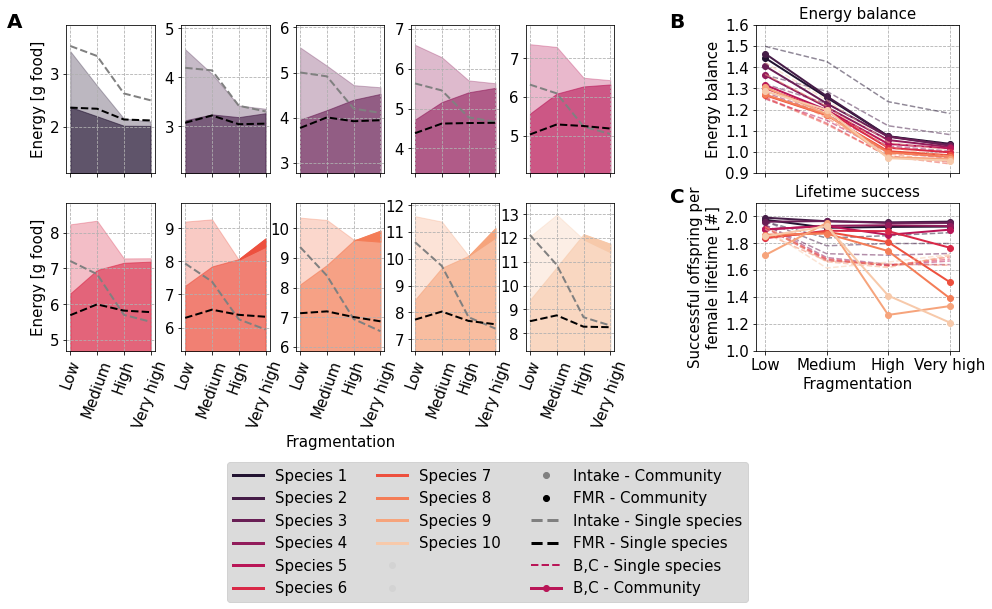

In [75]:
plt.figure(figsize=(16,6))

for i in range(10):
    plt.subplot2grid((2,8),(i//5,i%5))
    plt.subplots_adjust(wspace=0.3)
    c=colors[i]
    plt.fill_between(range(4),[0,0,0,0],np.nanmedian(intake_more2[:,i,:],axis=1)/2,color=c,alpha=0.3)
    plt.fill_between(range(4),[0,0,0,0],np.nanmedian(fmr_more2[:,i,:],axis=1),color=c,alpha=0.6)
    
    if any(np.nanmedian(intake_more2[:,i,:],axis=1)/2-np.nanmedian(fmr_more2[:,i,:],axis=1)<0):
        plt.fill_between([2,3],np.nanmedian(intake_more2[2:,i,:],axis=1)/2,np.nanmedian(fmr_more2[2:,i,:],axis=1),color=c,alpha=1)
    
    plt.plot(np.nanmedian(intake_single2[:,i,:],axis=1)/2,"--",color="grey",linewidth=2)
    plt.plot(np.nanmedian(fmr_single2[:,i,:],axis=1),"--",color="black",linewidth=2)

    plt.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)
    
    if i//5==1:
        plt.xticks([0,1,2,3],["Low","Medium","High","Very high"],fontsize=15,rotation=70)
        if i%5==2:
            plt.xlabel("Fragmentation",fontsize=15)
    else:
        plt.xticks(range(4),[])
    if i%5==0:
        plt.ylabel("Energy [g food]",fontsize=15)
    plt.yticks(range(round(min(np.nanmedian(fmr_single2[:,i,:],axis=1))-1),round(max(np.nanmedian(intake_more2[:,i,:],axis=1)/2)+1)),fontsize=15)
    plt.grid(b=True,linestyle="--")
    plt.ylim(min(np.nanmedian(fmr_single2[:,i,:],axis=1))-1,max(np.nanmedian(intake_more2[:,i,:],axis=1)/2)+0.5)
    
plt.subplot2grid((2,8),(0,6),colspan=2)
for i in range(10):
    c=colors[i]
    plt.plot(np.nanmedian((intake_more2/2/fmr_more2)[:,i,:],axis=1),"-o",color=c,linewidth=2)
    plt.plot(np.nanmedian((intake_single2/2/fmr_single2)[:,i,:],axis=1),"--",color=c,alpha=0.5,linewidth=1.5)
    plt.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)
plt.xticks(range(4),[])
plt.yticks(fontsize=15)
plt.ylabel("Energy balance",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.ylim(0.9,1.6)
plt.title("Energy balance",fontsize=15)
    
plt.subplot2grid((2,8),(1,6),colspan=2)
for i in range(10):
    c=colors[i]
    plt.plot(np.nanmedian(repsuchr_more2[:,i,:],axis=1),"-o",color=c,linewidth=2)
    plt.plot(np.nanmedian(repsuchr_single2[:,i,:],axis=1),"--",color=c,alpha=0.5,linewidth=1.5)
    plt.plot(0,0,color=c,label="Species "+str(i+1),linewidth=3)#["Low","Medium","High","Very high"],fontsize=15)
plt.xticks(range(4),["Low","Medium","High","Very high"],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Fragmentation",fontsize=15)
plt.ylabel("Successful offspring per\nfemale lifetime [#]",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.ylim(1,2.1)
plt.title("Lifetime success",fontsize=15)

plt.plot(0,0,"o",color="lightgrey",label="    ",linewidth=3)
plt.plot(0,0,"o",color="lightgrey",label="    ",linewidth=3)
plt.plot(0,0,"o",color="grey",label="Intake - Community",linewidth=3)
plt.plot(0,0,"o",color="black",label="FMR - Community",linewidth=3)
plt.plot(0,0,"--",color="grey",label="Intake - Single species",linewidth=3)
plt.plot(0,0,"--",color="black",label="FMR - Single species",linewidth=3)
plt.plot(0,0,"--",color=colors[4],label="B,C - Single species",linewidth=2)
plt.plot(0,0,"-o",color=colors[4],label="B,C - Community",linewidth=3)

plt.text(-12.3,3.4,"A",size=20, weight='bold')
plt.text(-1.55,3.4,"B",size=20, weight='bold')
plt.text(-1.55,2.1,"C",size=20, weight='bold')

plt.legend(bbox_to_anchor=(0.0,-0.7),ncol=3,fontsize=15,facecolor="lightgrey");

#plt.savefig("Figure5.eps", dpi=600, format='eps', metadata=None,bbox_inches="tight",backend=None)

#### Model validation

External data from literature is nessecary for this part:
Jones et al. (2009);
Kelt & van Vuren (2001);
Tucker et al. (2014);
Nagy (1999);
Nagy (2005);
Speakman (1999);
Speakman (2008)

In [76]:
this = pd.read_csv("manuscript_validation_data.csv")

Figure 2:

This figure can not be build without external data from literature!

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


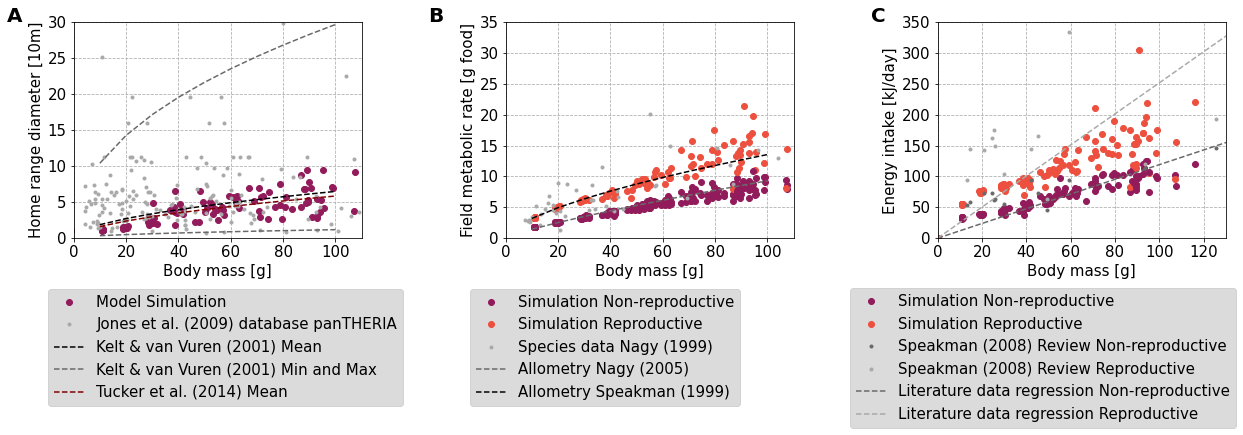

In [37]:
plt.figure(figsize=(16,3))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0)
plt.subplot2grid((1,3),(0,0))
for i in range(10):
    plt.plot(this["mean rm"+str(i)]*1000,this["mean hr"+str(i)],'o',color=colors[3])
plt.plot(-1,1,"o",color=colors[3],label="Model Simulation")
plt.plot(sub2["5-1_AdultBodyMass_g"],np.sqrt(sub2["22-1_HomeRange_km2"]*1000000/np.pi)/10*2,".",color="darkgrey",label="Jones et al. (2009) database panTHERIA")
plt.plot(np.arange(10,110,10),meanhr,"--",color="black",label="Kelt & van Vuren (2001) Mean")
plt.plot(np.arange(10,110,10),minhr,"--",color="dimgray",label="Kelt & van Vuren (2001) Min and Max")
plt.plot(np.arange(10,110,10),maxhr,"--",color="dimgray")
plt.plot(np.arange(10,110,10),meanhr2,"--",color="maroon",label="Tucker et al. (2014) Mean")
plt.ylim(0,30)
plt.xlim(0,110)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Body mass [g]",fontsize=15)
plt.ylabel("Home range diameter [10m]",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.legend(bbox_to_anchor=(1.17,-0.2),fontsize=15,facecolor="lightgrey")


plt.subplot2grid((1,3),(0,1))
field=np.zeros((10))
field2=np.zeros((10))
deflt = this
for i in range(10):
    c=colors[3]
    plt.plot(deflt["mean rm"+str(i)],deflt["mean field_young"+str(i)],'o',color=c)
    c=colors[3]
    plt.plot(deflt["mean rm"+str(i)],deflt["mean field_mal"+str(i)],'o',color=c)
    c=colors[6]
    plt.plot(deflt["mean rm"+str(i)],deflt["mean field_preg"+str(i)],'o',color=c)
    field[i]=fmr_nagy((0.01*i+0.01))
    field2[i]=fmr_speakman((0.01*i+0.01))
plt.plot(-1,-1,"o",color=colors[3],label="Simulation Non-reproductive")# Males")
plt.plot(-1,-1,"o",color=colors[6],label="Simulation Reproductive")# Females")
plt.plot(nagy_data_mass/1000,nagy_data_fmr,".",color="darkgrey",label="Species data Nagy (1999)")
plt.plot(np.arange(0.01,0.11,0.01),field,"--",color="dimgray",label="Allometry Nagy (2005)")
plt.plot(np.arange(0.01,0.11,0.01),field2,"--",color="black",label="Allometry Speakman (1999)")
plt.xticks(np.arange(0.0,0.11,0.02),np.arange(0,110,20),fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,0.11)
plt.ylim(0,35)
plt.xlabel("Body mass [g]",fontsize=15)
plt.ylabel("Field metabolic rate [g food]",fontsize=15)
plt.grid(b=True,linestyle="--")
plt.legend(bbox_to_anchor=(-0.15,-0.505),fontsize=15, loc='center left',facecolor="lightgrey")

plt.subplot2grid((1,3),(0,2))
deflt = this
for i in range(10):
    this=5*10*deflt["mean field_mal"+str(i)]*deflt["mean dig_mal"+str(i)]#(1-(deflt["mean bas_mal"+str(i)]+deflt["mean loco_mal"+str(i)]+deflt["mean grow_mal"+str(i)]+deflt["mean repro_mal"+str(i)]))
    plt.plot(deflt["mean rm"+str(i)]*100,this,'o',color=colors[3])
    this=5*10*deflt["mean field_preg"+str(i)]*deflt["mean dig_preg"+str(i)]#*(1-(deflt["mean bas_preg"+str(i)]+deflt["mean loco_preg"+str(i)]+deflt["mean grow_preg"+str(i)]+deflt["mean repro_preg"+str(i)]))
    plt.plot(deflt["mean rm"+str(i)]*100,this,'o',color=colors[6])
plt.plot(0,0,"o",color=colors[3],label="Simulation Non-reproductive")
plt.plot(0,0,"o",color=colors[6],label="Simulation Reproductive")
plt.xticks(np.arange(0,20,2),np.arange(0,200,20))
plt.plot(speakman_weights/10,speakman_ing_normal,'.',color="dimgray",label="Speakman (2008) Review Non-reproductive")
plt.plot(speakman_weights/10,speakman_ing_lact,'.',color="darkgrey",label="Speakman (2008) Review Reproductive")
plt.plot(np.arange(0,130,10),np.arange(0,130,10)*m1,"--",color="dimgrey",label="Literature data regression Non-reproductive")
plt.plot(np.arange(0,130,10),np.arange(0,130,10)*m2,"--",color="darkgrey",label="Literature data regression Reproductive")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Body mass [g]",fontsize=15)
plt.ylabel("Energy intake [kJ/day]",fontsize=15)
plt.ylim(0,350)
plt.xlim(0,13)
plt.grid(b=True,linestyle="--")
plt.legend(bbox_to_anchor=(-0.33,-0.555),fontsize=15, loc='center left',facecolor="lightgrey")

plt.text(-42,350,"A",size=20, weight='bold')
plt.text(-23,350,"B",size=20, weight='bold')
plt.text(-3,350,"C",size=20, weight='bold');

#plt.savefig("Figure2.eps", dpi=600, format='eps', metadata=None,bbox_inches="tight",backend=None)
